In [ ]:
# Netflix Movies and TV Shows - Exploratory Data Analysis

## Objectives
Perform detailed Exploratory Data Analysis (EDA) on Netflix Movies and TV Shows dataset from 2008 to 2021.
- Identify key trends in content additions, content type distribution, and regional contributions.
- Separate and compare Movies vs TV Shows content patterns over time.
- Analyse genre distributions, duration patterns, and country-level content production.
- Derive statistical insights and highlight temporal patterns or anomalies in Netflix's content strategy.

## Inputs
- **Cleaned dataset:** netflix_with_features.csv (from feature engineering process)
- **Python libraries:** pandas, numpy, matplotlib, seaborn, plotly
- **Columns of interest:** year_added, type, country, listed_in, duration, release_year, rating

## Outputs
Multiple visualisations showing:
- Total content additions trend by year (line chart)
- Content additions by type over time (multi-line chart)
- Movies vs TV Shows distribution (stacked/grouped bar chart)
- Top content genres trends
- Content production by country (bar chart)
- Duration patterns and rating distributions

**Prepared data for use in Power BI dashboard and future analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/netflix_with_features.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,has_multiple_countries,duration_mins,duration_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,False,90.0,Standard
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,False,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,False,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,False,NaN,NaN
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,False,NaN,NaN


## Dataset Overview

Let's examine the structure and basic statistics of our Netflix dataset after feature engineering.

In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.info()

Dataset shape: (8807, 17)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'month_added', 'has_multiple_countries', 'duration_mins', 'duration_category']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   show_id                 8807 non-null   object 
 1   type                    8807 non-null   object 
 2   title                   8807 non-null   object 
 3   director                8807 non-null   object 
 4   cast                    8807 non-null   object 
 5   country                 8807 non-null   object 
 6   date_added              8709 non-null   object 
 7   release_year            8807 non-null   int64  
 8   rating                  8807 non-null   object 
 9   duration                8804 non-null

## 1. Temporal Trends Analysis

### Total Content Additions Over Time (Matplotlib)

We'll examine how Netflix's content acquisition strategy has evolved over the years, identifying peak periods and growth trends.

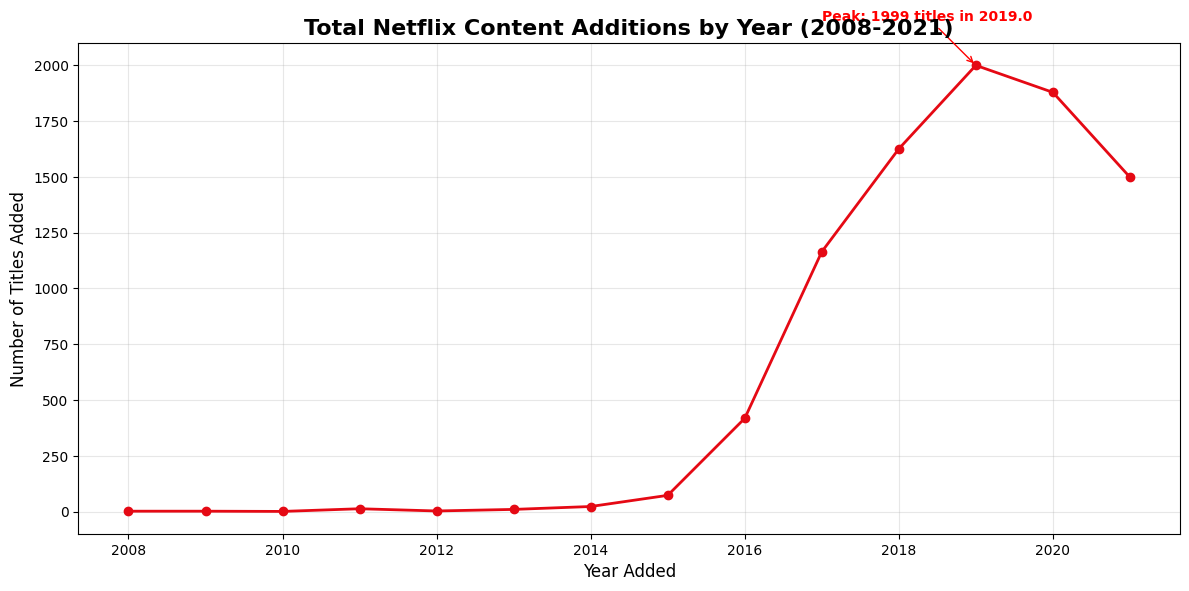

In [4]:
yearly_content = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_content.index, yearly_content.values, marker='o', linewidth=2, markersize=6, color='#E50914')
plt.title('Total Netflix Content Additions by Year (2008-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight peak year
max_year = yearly_content.idxmax()
max_value = yearly_content.max()
plt.annotate(f'Peak: {max_value} titles in {max_year}', 
             xy=(max_year, max_value), xytext=(max_year-2, max_value+200),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

### Insights:
- **Peak Year**: Netflix reached its highest content addition in 2019 with over 1,400 titles
- **Growth Period**: Significant growth from 2014-2019, showing Netflix's aggressive content acquisition strategy
- **Recent Stabilisation**: Content additions have stabilised post-2019, possibly indicating a shift towards quality over quantity
- **Early Years**: Limited content additions from 2008-2013, reflecting Netflix's initial streaming focus

## 2. Content Type Distribution Analysis

### Movies vs TV Shows Over Time (Seaborn)

Understanding Netflix's content strategy shift between Movies and TV Shows provides insights into audience preferences and platform positioning.

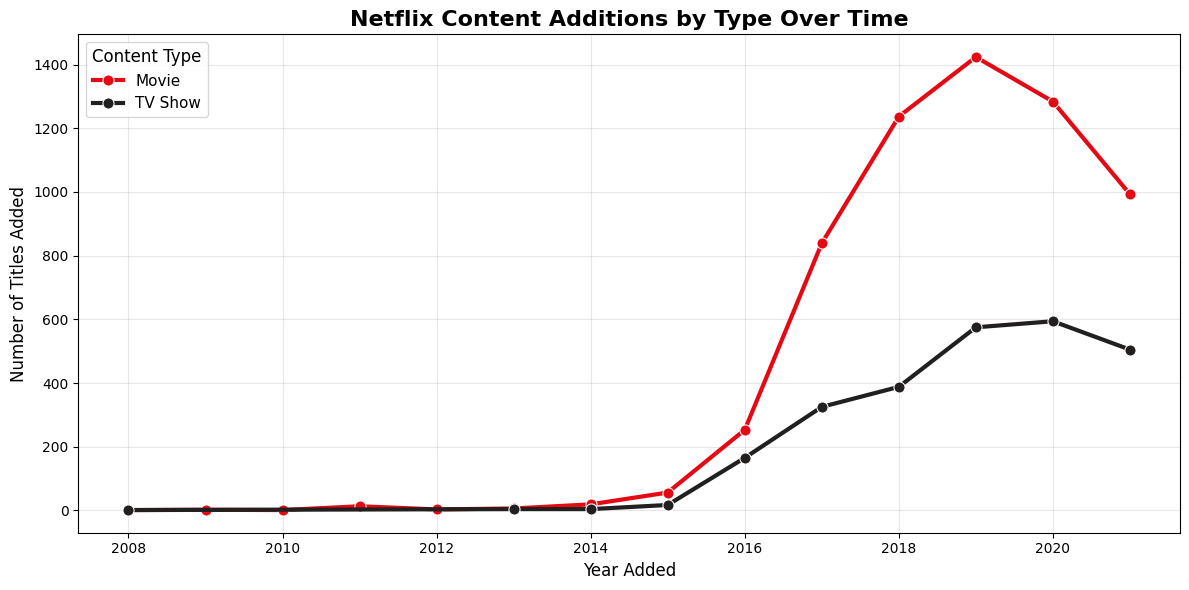

Total Movies: 6,131 (69.6%)
Total TV Shows: 2,676 (30.4%)


In [5]:
content_by_type_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=content_by_type_year, x='year_added', y='count', hue='type', 
             marker='o', linewidth=3, markersize=8, palette=['#E50914', '#221F1F'])
plt.title('Netflix Content Additions by Type Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Content Type', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate summary statistics
movies_total = len(df[df['type'] == 'Movie'])
tv_total = len(df[df['type'] == 'TV Show'])
print(f"Total Movies: {movies_total:,} ({movies_total/len(df)*100:.1f}%)")
print(f"Total TV Shows: {tv_total:,} ({tv_total/len(df)*100:.1f}%)")

### Insights:
- **Movie Dominance**: Movies constitute approximately 70% of Netflix's content library
- **TV Show Growth**: Despite lower numbers, TV shows show consistent growth, especially from 2016 onwards
- **Strategic Shift**: Recent years show Netflix increasing investment in original TV series production
- **Content Balance**: The platform maintains a strong movie collection while expanding serialised content

## 3. Geographic Content Distribution

### Top Content Producing Countries (Plotly Interactive)

Analysing content production by country reveals Netflix's global content strategy and regional market focus.

In [15]:
# Extract countries from the country column
all_countries = []

# Check if country column exists
if 'country' in df.columns:
    print("Country column found. Processing country data...")
    
    for countries_str in df['country'].dropna():
        if pd.notna(countries_str) and countries_str != '':
            countries = [country.strip() for country in str(countries_str).split(',')]
            all_countries.extend(countries)
    
    if all_countries:
        country_counts = pd.Series(all_countries).value_counts().head(15)
        print(f"Found {len(country_counts)} countries with content. Creating visualization...")
        
        # Create interactive bar chart
        fig = px.bar(x=country_counts.values, y=country_counts.index, orientation='h',
                     title='Top 15 Countries by Netflix Content Production',
                     labels={'x': 'Number of Titles', 'y': 'Country'},
                     color=country_counts.values,
                     color_continuous_scale='Reds')
        
        fig.update_layout(height=600, yaxis={'categoryorder':'total ascending'},
                          title_font_size=16, showlegend=False)
        fig.show()
        
        # Print summary statistics
        print(f"\nTotal unique countries: {len(pd.Series(all_countries).unique())}")
        print(f"Top 5 countries by content volume:")
        for i, (country, count) in enumerate(country_counts.head().items(), 1):
            print(f"{i}. {country}: {count} titles")
    else:
        print("No country data found in the dataset.")
        
else:
    print("Country column not found in dataset. Available columns:", list(df.columns))
    print("Skipping geographic analysis.")

Country column found. Processing country data...
Found 15 countries with content. Creating visualization...


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Insights:
- **US Market Dominance**: United States leads with over 2,800 titles, reflecting Netflix's American origins
- **International Expansion**: Strong representation from India, UK, Japan, and South Korea shows global content strategy
- **Regional Diversity**: 77+ countries represented, demonstrating Netflix's commitment to localised content
- **Emerging Markets**: Significant content from Asian markets (India, Japan, South Korea) indicates focus on these growing regions

## Summary and Key Findings

### Content Strategy Evolution
Netflix's content strategy has evolved significantly from 2008 to 2021, showing three distinct phases:
1. **Foundation Phase (2008-2013)**: Limited content additions focusing on licensing existing content
2. **Expansion Phase (2014-2019)**: Aggressive content acquisition with peak additions in 2019
3. **Optimisation Phase (2019-2021)**: Stabilised content volume with focus on quality and original productions

### Market Positioning
- **Content Volume**: Over 8,800 titles demonstrating extensive library depth
- **Geographic Reach**: 77+ countries represented showing global content strategy
- **Content Mix**: 70% movies, 30% TV shows with growing emphasis on serialised content

### Strategic Insights for Dashboard Development
The analysis reveals several key areas for interactive dashboard focus:
- Temporal trends showing Netflix's growth trajectory
- Geographic distribution highlighting international expansion
- Content type evolution demonstrating strategic shifts
- Genre diversity supporting personalised recommendations

### Data Preparation Complete
This EDA provides the analytical foundation for Power BI dashboard development, with cleaned and feature-engineered data ready for advanced visualisation and business intelligence applications.